**Deep Neural Network for Image Classification**

---



**Step 1: Data Preprocessing**

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Step 2: Model Design**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flatten and fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 3: Model Training (10 Epochs)**

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 197s 251ms/step - accuracy: 0.7439 - loss: 0.7513 - val_accuracy: 0.7701 - val_loss: 0.6855 - learning_rate: 0.0010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 197s 245ms/step - accuracy: 0.7468 - loss: 0.7346 - val_accuracy: 0.7009 - val_loss: 0.8845 - learning_rate: 0.0010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 188s 240ms/step - accuracy: 0.7508 - loss: 0.7273 - val_accuracy: 0.7628 - val_loss: 0.7166 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 241ms/step - accuracy: 0.7739 - loss: 0.6643 - val_accuracy: 0.7989 - val_loss: 0.6004 - learning_rate: 5.0000e-04
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 218s 262ms/step - accuracy: 0.7837 - loss: 0.6265 - val_accuracy: 0.7947 - val_loss: 0.6074 - learning_rate: 5.0000e-04
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 206s 263ms/step - accuracy: 0.7872 - loss: 0.6214 - val_accuracy: 0.8061 - val_loss: 0.5783 - learning_rate: 5.0000e-04
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 241ms/s

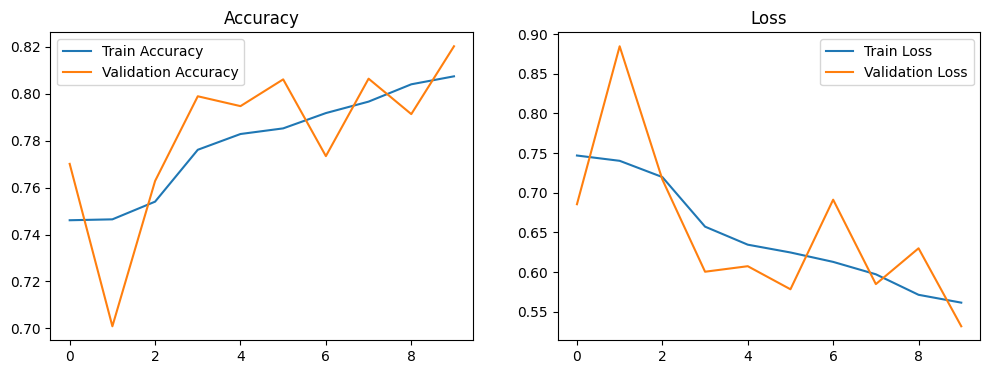

In [4]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Train the model for 10 epochs
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_test, y_test),
    epochs=10,  # Updated to 10 epochs
    callbacks=[early_stopping, lr_scheduler]
)

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


**Step 4: Model Evaluation**

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8197 - loss: 0.5245
Test Accuracy: 82.02%
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


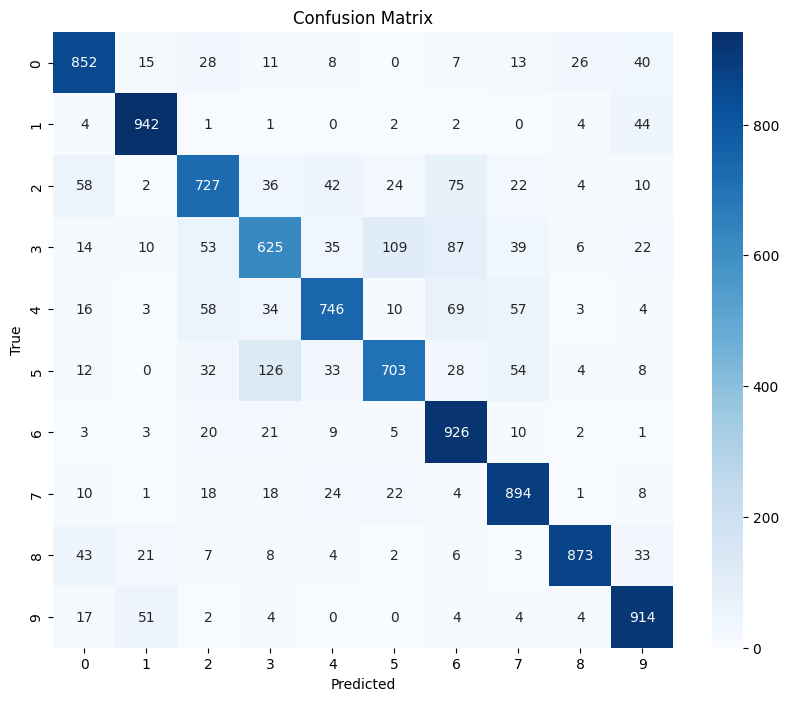

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Step 5: Error Analysis**

In [7]:
# Error Analysis
error_counts = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
error_classes = np.argsort(error_counts)[-3:][::-1]
print("Common Misclassifications:")
for i, cls in enumerate(error_classes, 1):
    print(f"{i}. Class {cls} is frequently misclassified.")




Common Misclassifications:
1. Class 3 is frequently misclassified.
2. Class 5 is frequently misclassified.
3. Class 2 is frequently misclassified.
